In [1]:
import pandas as pd
import talib
import yfinance as yf





In [2]:
# Load stock price data
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\MSFT_historical_data.csv') 
# Convert 'Date' to datetime format and set it as the index
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert relevant columns to numeric and fill null values
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count null values
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Remove rows with any null values
df_cleaned = df.dropna()

# Display shape before and after cleaning
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# If you need to continue with calculations
df_cleaned['SMA'] = talib.SMA(df_cleaned['Close'], timeperiod=14)
df_cleaned['RSI'] = talib.RSI(df_cleaned['Close'], timeperiod=14)
df_cleaned['MACD'], df_cleaned['MACD_Signal'], df_cleaned['MACD_Hist'] = talib.MACD(df_cleaned['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Final DataFrame structure
print("Final cleaned DataFrame structure:")
print(df_cleaned.info())
print(df.dtypes)

Null values in each column:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Original DataFrame shape: (10998, 8)
Cleaned DataFrame shape: (10998, 8)
Final cleaned DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10998 non-null  float64
 1   High          10998 non-null  float64
 2   Low           10998 non-null  float64
 3   Close         10998 non-null  float64
 4   Adj Close     10998 non-null  float64
 5   Volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
 8   SMA           10985 non-null  float64
 9   RSI           10984 non-null  float64
 10  MACD          10965 non-null  float64
 11  MACD_Signal   109

In [3]:
null_counts = df.isnull().sum()

In [4]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [5]:
# If 'Date' is found, convert it to datetime and set as index
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\MSFT_historical_data.csv') 
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    print("Date column converted and set as index.")
    df=[print(df.head)]
   
else:
    print("No 'Date' column found. Please check the CSV structure.")
    


Date column converted and set as index.
<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...                ...         ...         ...         ...         ...   
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.11

In [ ]:
# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days
# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12,slowperiod=26,signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()
# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])                    

                 Close         SMA        RSI      MACD  MACD_Signal  \
Date                                                                   
1983-04-28    0.223214    0.135617  61.444021  0.009090     0.006823   
1983-04-29    0.225446    0.136448  61.562695  0.009238     0.007306   
1983-05-02    0.218750    0.137243  60.996627  0.008715     0.007588   
1983-05-03    0.216518    0.138008  60.809310  0.008027     0.007676   
1983-05-04    0.229911    0.138839  61.521909  0.008466     0.007834   
...                ...         ...        ...       ...          ...   
2024-07-24  218.539993  188.122350  54.698178  4.662717     6.678882   
2024-07-25  217.490005  188.322350  54.558096  3.748082     6.092722   
2024-07-26  217.960007  188.517200  54.610391  3.026267     5.479431   
2024-07-29  218.240005  188.716450  54.641643  2.448591     4.873263   
2024-07-30  218.800003  188.911450  54.704333  2.012764     4.301163   

            MACD_Hist  
Date                   
1983-04-28   0.

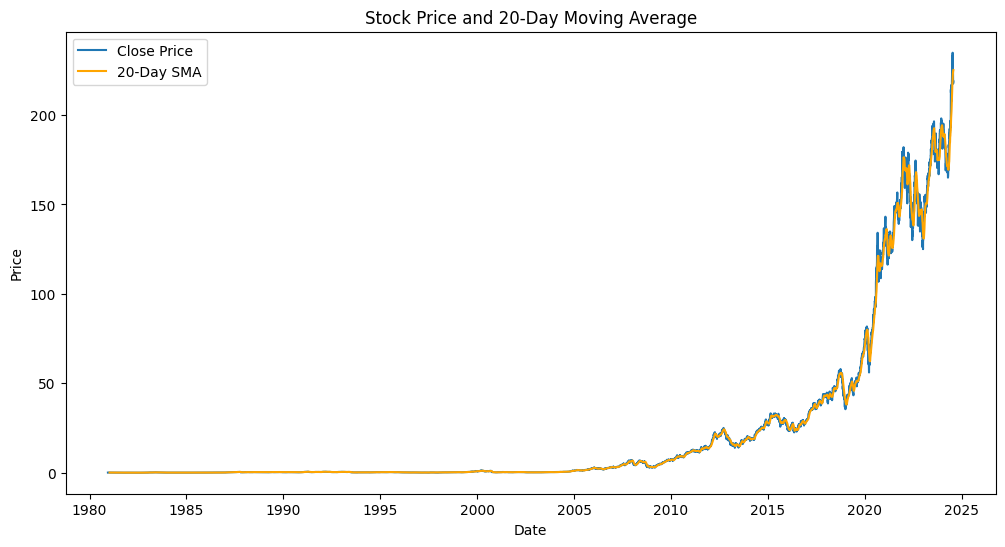

In [ ]:
import matplotlib.pyplot as plt
# Load the data into a DataFrame
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\MSFT_historical_data.csv', parse_dates=['Date'], index_col='Date')

# Ensure the 'Close' column is  correct data type
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate a 20-day moving average
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
# Plot the closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and 20-Day Moving Average')
plt.legend()
plt.show()